# Computer Vision Assignment-1


Name :- Vivek Kumar
Student Id:- 19300755
Module:- Computer Vision(CG7GV1)

# Part#1 Histogram


1.a Reads the image

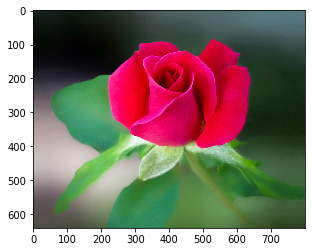

In [2]:
#importing the required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
#from scipy import ndimage
%matplotlib inline

#Read a RGB colour image (e.g. png) and display it.
img = cv2.imread('rose.png')
#used cv2 function to convert to different image format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


1.b Convert the RGB image into Lab colour system and display each component (L,a,b) as an grey level image

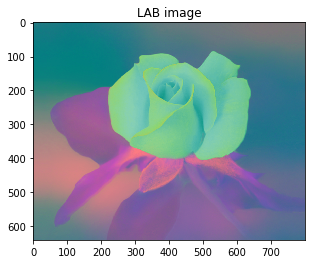

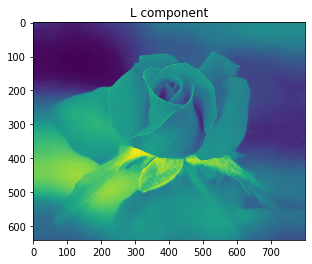

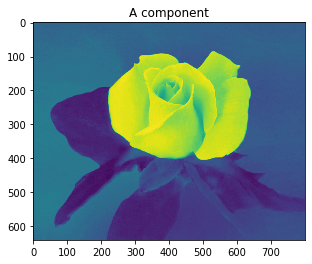

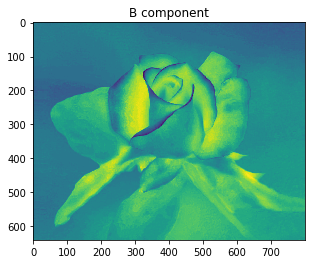

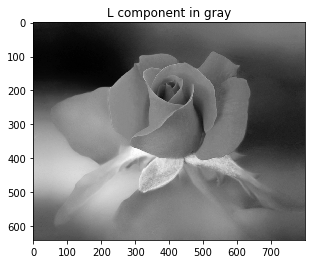

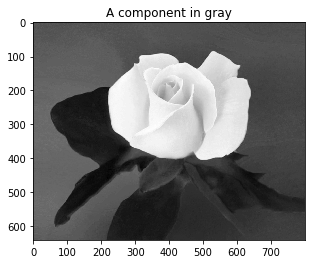

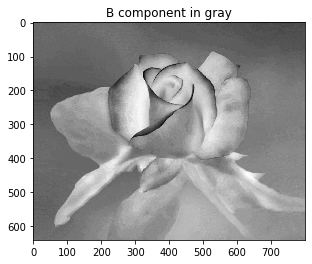

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
#from scipy import ndimage
%matplotlib inline

img = cv2.imread('rose.png')
lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

l,a,b = cv2.split(lab_image)
plt.title( 'LAB image')
plt.imshow(lab_image)
plt.figure()
plt.title('L component')
plt.imshow(l)
plt.figure()
plt.title('A component')
plt.imshow(a)
plt.figure()
plt.title('B component')
plt.imshow(b)
plt.figure()
plt.title('L component in gray')
plt.imshow(l,'gray')
plt.figure()
plt.title('A component in gray')
plt.imshow(a,'gray')
plt.figure()
plt.title('B component in gray')
plt.imshow(b,'gray')


1.c Compute the spatial derivatives of the luminance component L in the horizontal and vertical direction using convolution by the derivatives of Gaussian filter. Display each these derivatives as grey level images.

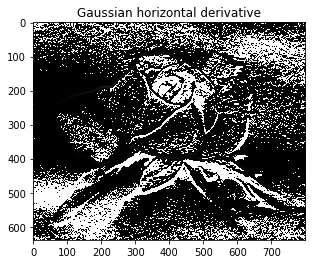

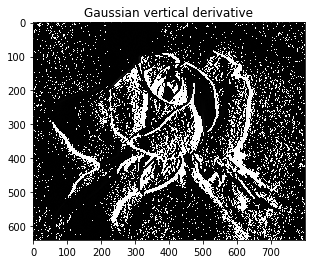

In [7]:
from matplotlib import pyplot as plt
import scipy.ndimage as img

img_gaussian = cv2.GaussianBlur(l,(5,5),5,5)
#Derivative along dx
image_dx = np.diff(img_gaussian,axis=0)
plt.imshow(image_dx,cmap=plt.cm.gray,interpolation='none')
plt.title('Gaussian horizontal derivative')
plt.show()

#Derivative along dy
image_dy = np.diff(img_gaussian,axis=1)
plt.imshow(image_dy,cmap=plt.cm.gray,interpolation='none')
plt.title('Gaussian vertical derivative')
plt.show()
    

1.d Compute a 2D histogram with the chrominance component (a,b) and display the histogram as a grey image (heat map) and/or as a 3D surface (bar plot)

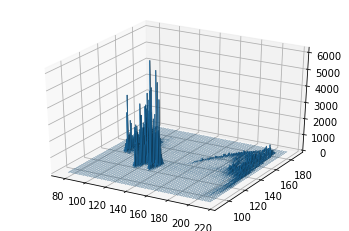

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.colors as colors

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

histg, xb, yb = np.histogram2d(a.ravel(),b.ravel(),bins=100)
plt.figure()
#plt.imshow(histg,cmap='gray',interpolation = 'nearest',vmin=0,vmax=255)

# Construct arrays for the anchor positions with 16 bars.
xpos, ypos = np.meshgrid(xb[:-1] + 0.25, yb[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = histg.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average') 

1.e Using a part of the image to compute a 2D histogram model with the chrominance component (a,b), compute a back projection map with this model histogram in the target image

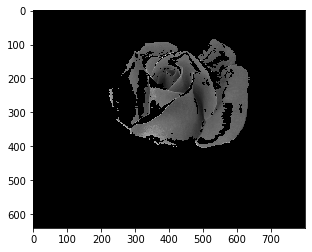

In [11]:
souce_image = "rose.png"
target_image = "rose1.png"
souce_image_1 = cv2.imread(souce_image)
souce_image = cv2.cvtColor(souce_image_1, cv2.COLOR_BGR2RGB)
target_image_1 = cv2.imread(target_image)
target_image = cv2.cvtColor(target_image_1, cv2.COLOR_BGR2LAB)
img_src1 = cv2.cvtColor(souce_image_1, cv2.COLOR_BGR2LAB)
tgt_hist = cv2.calcHist([target_image], [1, 2], None, [256, 256], [0, 256, 0, 256])
target_backp = cv2.calcBackProject([img_src1],[1,2],tgt_hist,[0,256,0,256],1)

#Removing Noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
target_backp = cv2.filter2D(target_backp,-1,kernel)

#mark the image using binary threshold
_, target_backp = cv2.threshold(target_backp, 127, 255, cv2.THRESH_BINARY)
target_backp = cv2.merge((target_backp, target_backp, target_backp))
result = cv2.bitwise_and(souce_image,target_backp)
#plot_image(result,'Back Projection for image')
result1 = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
plt.imshow(result1,cmap='gray')

1.f Perform histogram equalization using 1D histogram using the luminance L computed in 1.a. Display the resulting image with enhanced contrast

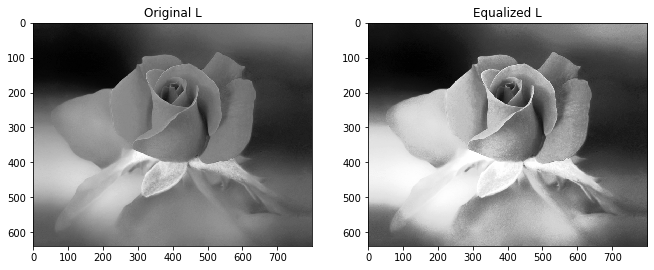

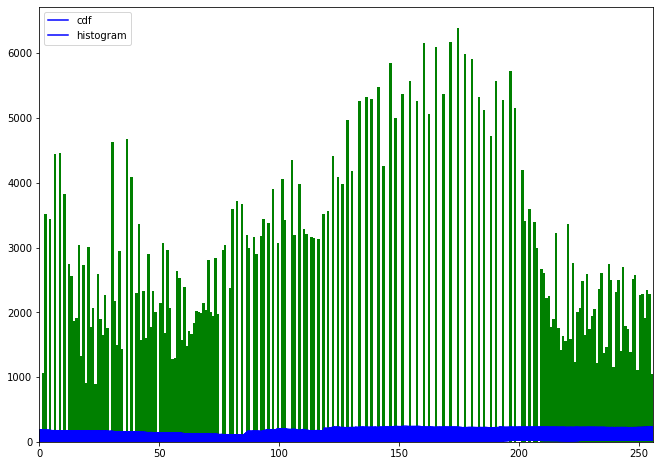

In [12]:
from matplotlib import rcParams
import cv2

eq_channels = []
eq_channels.append(cv2.equalizeHist(l))

equlized_image = cv2.merge(eq_channels)

#Plot the images next to each other and used rcparams to do that
rcParams['figure.figsize'] = 11 ,8
fig,axs = plt.subplots(1,2)
axs[0].imshow(l,cmap="gray")
axs[0].title.set_text('Original L')
axs[1].imshow(equlized_image,cmap="gray")
axs[1].title.set_text('Equalized L')
plt.figure()

#plotting the histogram
plt.plot(equlized_image, color = 'b')
plt.hist(equlized_image.flatten(),256,[0,256], color = 'g')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

1.g Evaluate the performance of these techniques with histograms (i.e. illustrate when it works, and when it does not work).

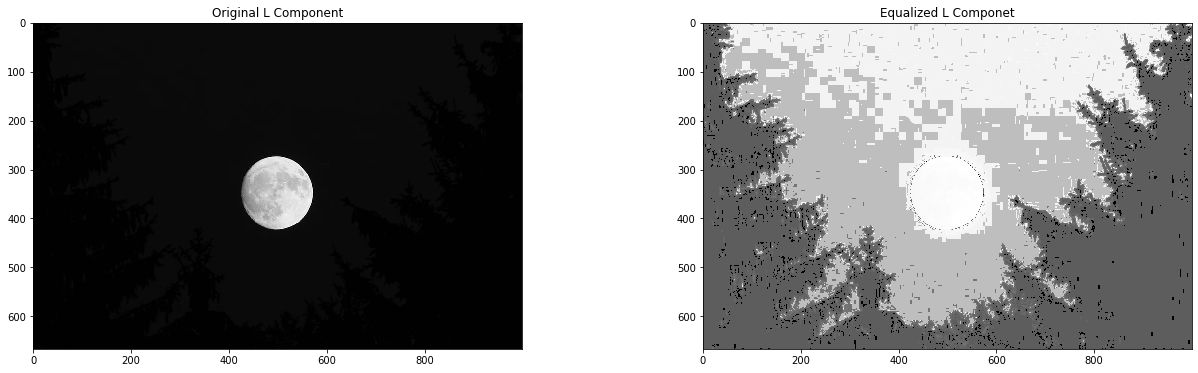

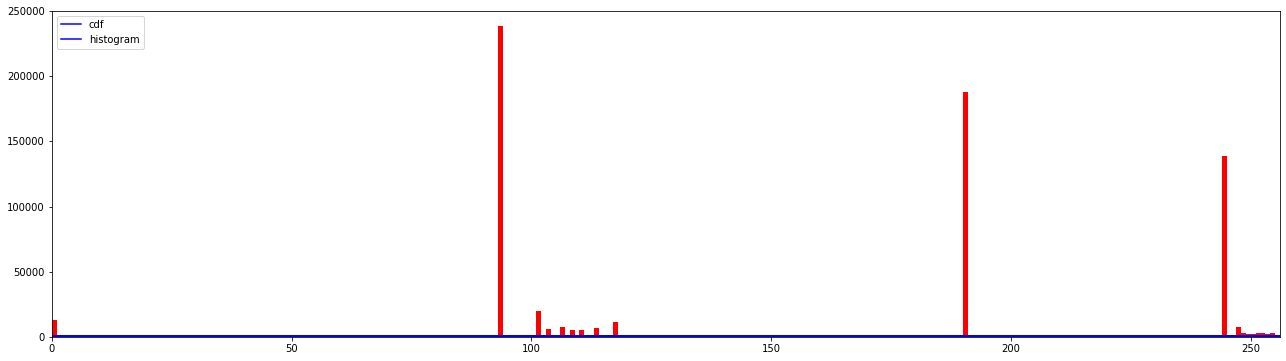

In [15]:
#1G Evaluate the performance
from matplotlib import rcParams
#read image
img_bgr=cv2.imread('photo.jfif',1)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

#Calclate the LAB coponents
l_c,a,b = cv2.split(img_rgb)

#Calcuate the histogram
eq_ch = []
eq_ch.append(cv2.equalizeHist(l_c))
eq_image = cv2.merge(eq_ch)

rcParams['figure.figsize'] = (22 ,6)
fig,ax = plt.subplots(1,2)
ax[0].imshow(l_c,cmap="gray")
ax[0].title.set_text('Original L Component')
ax[1].imshow(eq_image,cmap="gray")
ax[1].title.set_text('Equalized L Componet')

plt.figure()
plt.plot(eq_image, color = 'b')
plt.hist(eq_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

From the above equilzation we observe that the histogram works when the colors are distributed in the image, wheres when the image as above with a single object is selected the background color overtakes the object color,hence the histogram fails to equilalize.

#  Part#2 PCA

2.a. Compute the mean image and principal components for a set of images (e.g. use the training images of ‘5’ in the mnist dataset). Display the mean image and the first 2 principal components (associated with the highest eigenvalues).

C:\ProgramData\Anaconda4\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


<Figure size 1584x432 with 0 Axes>

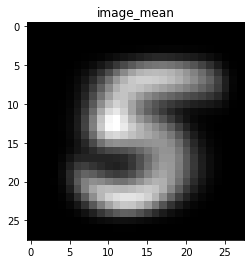

<Figure size 1584x432 with 0 Axes>

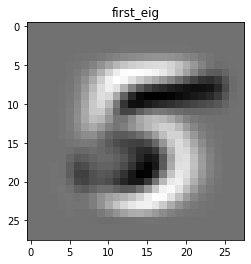

<Figure size 1584x432 with 0 Axes>

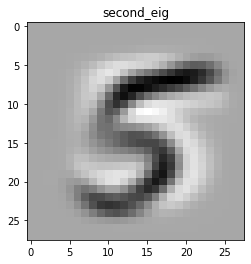

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
import seaborn as sns
import tensorflow as tf
n=5
images,labels = fetch_openml('mnist_784', version=1, return_X_y=True)
all_train= 60000 #The size of the training set
test = images[all_train:]
test_lbl = labels[all_train:]
train = images[:all_train]
train_lbl = labels[:all_train]
train_imgs,train_lbls,test_imgs,test_lbls = (train.astype(np.float32)/255,train_lbl.astype(np.float32),test.astype(np.float32)/255,test_lbl.astype(np.float32))
labels_n = np.where(train_lbls == n)
imagematrix = train_imgs[list(labels_n)]
X1=imagematrix
num_data,dimension = X1.shape
#calcualate mean
mean_X1 = X1.mean(axis=0)
X1 = X1-mean_X1
#for higher dimension images
if dimension>num_data:
    covM = np.dot(X1,X1.T) #covariance matrix
    eg,EV = np.linalg.eigh(covM) #eigenvalues and eigne vectors
    tmp = np.dot(X1.T,EV).T  #vector multiplication to match the dimension
    egVector = tmp[::-1] #reverce to get the highest eigen vectors
    revS_eg = np.sqrt(eg)[::-1] #reverse the vector to get highest eigen values
    for i in range(egVector.shape[1]):
        egVector[:,i] /= revS_eg
else:
    U,revS_eg,egVector = np.linalg.svd(X1)
    egVector = egVector[:num_data]
egVector = egVector
eigen = revS_eg
imgmean = mean_X1
plt.gray()
fig = plt.figure(figsize=(4,4))
plt.imshow(imgmean.reshape(28,28))
plt.title("image_mean")
plt.show()
plt.gray()
fig = plt.figure(figsize=(4,4))
plt.imshow(egVector[0].reshape(28,28))
plt.title("first_eig")
plt.show()

plt.gray()
fig = plt.figure(figsize=(4,4))
plt.imshow(egVector[1].reshape(28,28))
plt.title("second_eig")
plt.show()


2.b Compute and display the reconstructions of a test image using the mean image and with p principal components associated with the p highest eigenvalues (e.g. Fig 10.12) with p=10 and p=50.

C:\ProgramData\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1584x432 with 0 Axes>

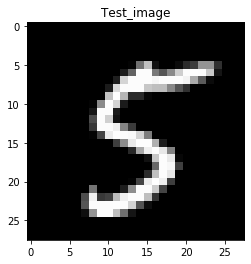

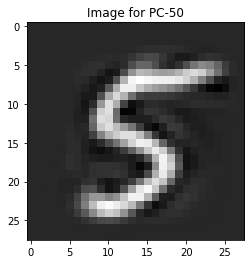

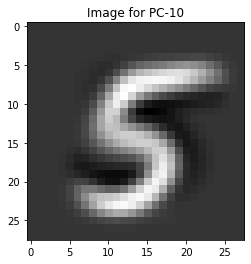

In [20]:
#Construct the test image for pca
tlab = np.where(test_lbls == 5)
tst_img = test_imgs[list(tlab)]
test_img = tst_img[10]

pca_reconst_10 = np.dot(np.dot(test_img - mean_X1,egVector[:10].T),egVector[:10]) + mean_X1
pca_reconst_50 = np.dot(np.dot(test_img - mean_X1,egVector[:50].T),egVector[:50]) + mean_X1

plt.gray()
fig = plt.figure(figsize=(4,4))
plt.imshow(test_img.reshape(28,28))
plt.title("Test_image")
plt.show()


fig = plt.figure(figsize=(4,4))
plt.imshow(pca_reconst_50.reshape(28,28))
plt.title("Image for PC-50")
plt.show()

fig = plt.figure(figsize=(4,4))
plt.imshow(pca_reconst_10.reshape(28,28))
plt.title("Image for PC-10")
plt.show()

2.c Compute and display a DFFS (distance-from feature-space) and SSD (sum-of-square-differences) heat maps for detection using your PCA
representation of a MNIST number.

C:\ProgramData\Anaconda4\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


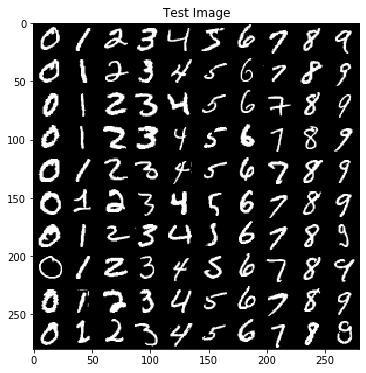

In [22]:
#Test Image for ssd and dffs
test_img_scale =  []
for i in range(10):
    for j in range(10):
        label_i = np.where(train_lbls == j)
        test_img_scale.append(train_imgs[label_i[0][i]])
temp = np.hstack( (np.asarray([ i.reshape(28,28) for i in test_img_scale ])))
test_img_scale =  []
for i in range(0,temp.shape[1],280):
    test_img_scale.append(np.array(temp[0:28,0+i:280+i]))
test_image = np.vstack(X1 for X1 in test_img_scale)
plt.imshow(test_image)
plt.title("Test Image")
target_img = test_image

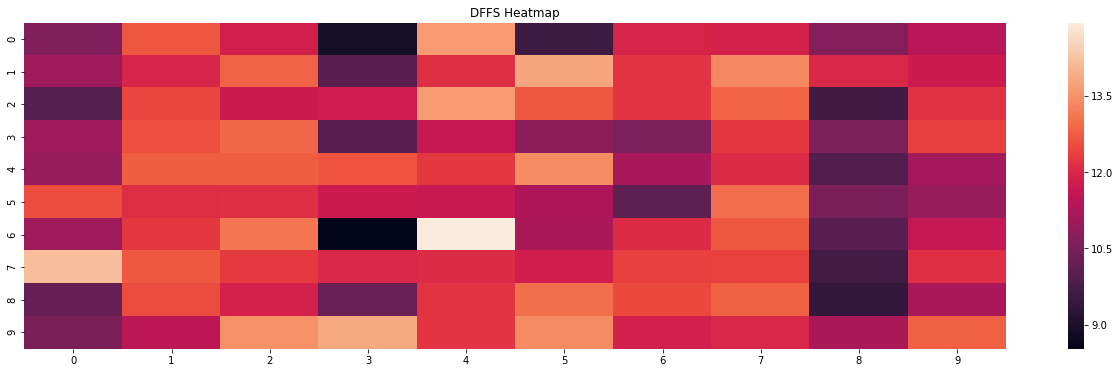

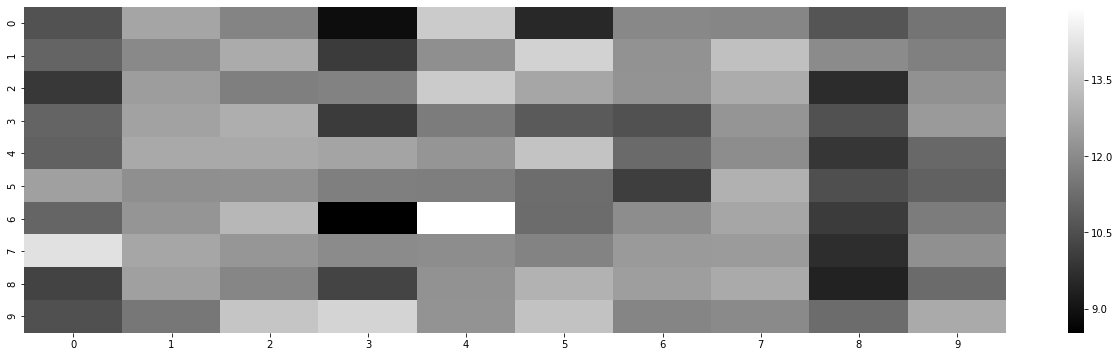

In [34]:
#Heat map of dffs

imagemean = mean_X1
pca_reconst = np.dot(np.dot(test_img - mean_X1,egVector[:784].T),egVector[:784]) + mean_X1

df_vec = []
for i in range(0,target_img.shape[0],28):
    for j in range(0,target_img.shape[1],28):
        #Calcuate dffs distance matrix
        df_vec.append(np.sqrt(np.sum(np.square(np.subtract(np.subtract(target_img[0+i:28+i,j:28+j],imagemean.reshape(28,28)),pca_reconst.reshape(28,28)))))) 
#Plot Heat map of ssd
plt.figure()
plt.title("DFFS Heatmap")
sns.heatmap(np.array(df_vec).reshape(10,10))
plt.figure()
sns.heatmap(np.array(df_vec).reshape(10,10),cmap='gray')

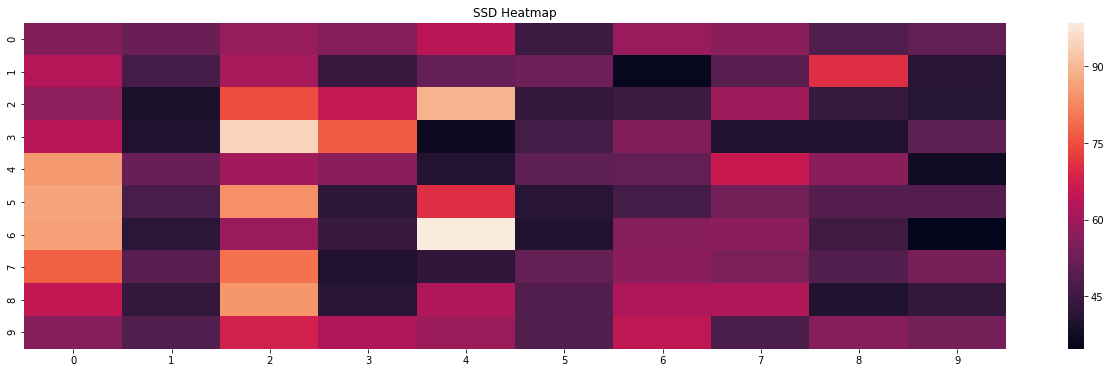

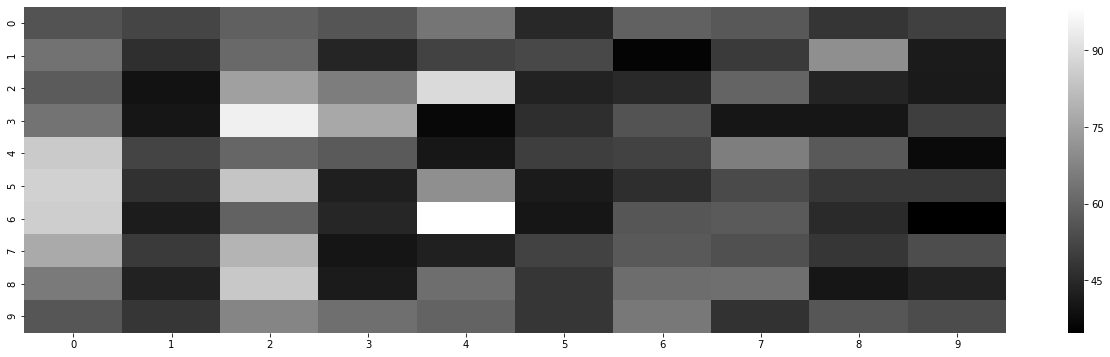

In [36]:
#Heat map of ssd
sd_vector = []
for i in range(0,target_img.shape[0],28):
    for j in range(0,target_img.shape[1],28):
        #Calcuate ssd distance matrix
        sd_vector.append(np.sum(np.square(np.subtract(target_img[i:28+i,j:28+j],imagemean.reshape(28,28)))))
#Plot Heat map of ssd
plt.figure()
plt.title("SSD Heatmap")
sns.heatmap(np.array(sd_vector).reshape(10,10))
plt.figure()
sns.heatmap(np.array(sd_vector).reshape(10,10),cmap='gray')

“Sum of squared differences (SSD) is one of measure of match that based on pixel by pixel intensity differences between the two images. It calculates the summation of squared for the product of pixels subtraction between two images. With this similarity measure, matching point can be determined by consider the location of minimum value in the image matrices.  SSD is generally only used due to its simplicity and relatively low computational cost - in general you will get better results using Normalized Cross Correlation.”

DFFS(Distance-from feature-space)  – when we take the projection of SSD in eigenspace. 
		DFFS = SSD - (summation of principle component)^2
        
Here, in thsi case, SSD heat map is better than DFFS for the target image but it may change by changing the target image. Here the target image is a mixture of many images that may be handwritten or typed by different people. Heat map are plotted by sliding the pixel by pixel and using padding for the corners. Padding the image will not change the image much, so it is done for better image.


The .py code can be found in the below github link. https://github.com/